In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

Variables descripción: 

<img src="./pictures/variables GT.jpg">

Gas Turbine (GT) diagram and locations for sensor where variables are measured:

<img src="./pictures/GT-diagram.jpg">

In [2]:
#Exploratory Data Analysis of data 
#Loading dataset
df = pd.read_csv('data/gt_full.csv', index_col=0)
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
1,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
2,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
3,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
4,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
5,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
36729,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
36730,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
36731,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
36732,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


In [3]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [4]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


In [5]:
#Train-Test-Split
X = df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']]
y = df[['CO', 'NOX']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)


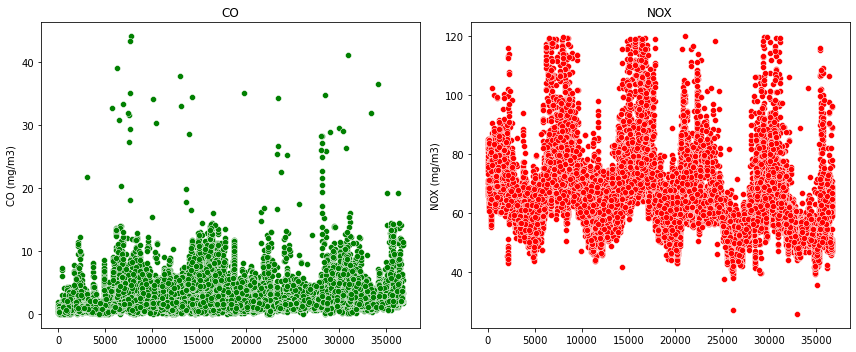

In [6]:
#Preprocessing data 
#Standarization and mapping to a Gaussian distribution
#First, let's take a look at the two targets (CO and NOX)
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12,5))
sns.scatterplot(x=y_train.index, y='CO', data=y_train, ax=axs[0], color='g')
axs[0].set_title('CO')
axs[0].set_ylabel('CO (mg/m3)')
sns.scatterplot(x=y_train.index, y='NOX', data=y_train, ax=axs[1], color='r')
axs[1].set_title('NOX')
axs[1].set_ylabel('NOX (mg/m3)')
plt.tight_layout()
plt.show()

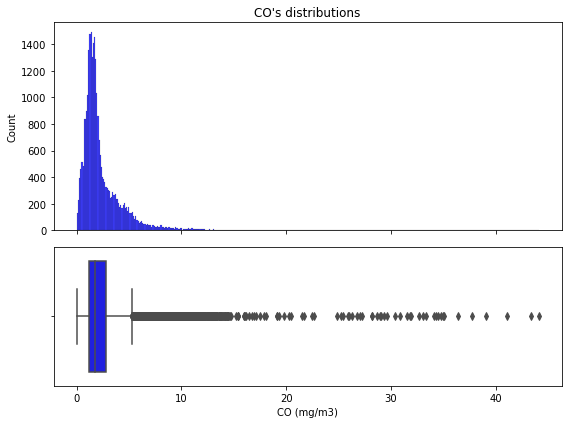

In [7]:
#Histograms for y_train variables
#CO
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8,6), sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(x= 'CO', data=y_train, ax=axs[0], color='b')
sns.boxplot(x= 'CO', data=y_train, ax=axs[1], color='b')
axs[0].set_title("CO's distributions")
axs[1].set_xlabel('CO (mg/m3)')
plt.tight_layout()
plt.show()


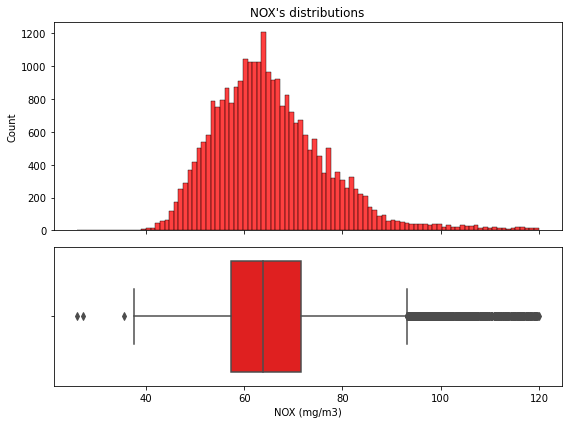

In [8]:
#Histograms for y_train variables
#NOX
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8,6), sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(x= 'NOX', data=y_train, ax=axs[0], color='r')
sns.boxplot(x= 'NOX', data=y_train, ax=axs[1], color='r')
axs[0].set_title("NOX's distributions")
axs[1].set_xlabel('NOX (mg/m3)')
plt.tight_layout()
plt.show()

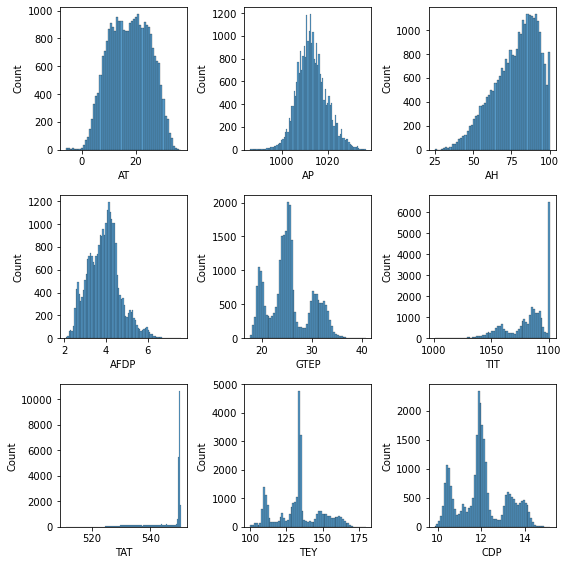

In [9]:
#Histograms for X_train variables 
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(8,8))
sns.histplot(data=X_train, x='AT', ax=axs[0,0])
sns.histplot(data=X_train, x='AP', ax=axs[0,1])
sns.histplot(data=X_train, x='AH', ax=axs[0,2])
sns.histplot(data=X_train, x='AFDP', ax=axs[1,0])
sns.histplot(data=X_train, x='GTEP', ax=axs[1,1])
sns.histplot(data=X_train, x='TIT', ax=axs[1,2])
sns.histplot(data=X_train, x='TAT', ax=axs[2,0])
sns.histplot(data=X_train, x='TEY', ax=axs[2,1])
sns.histplot(data=X_train, x='CDP', ax=axs[2,2])
plt.tight_layout()
plt.show()

In [10]:
#Pipeline for standarization and transformations
#Importing libreries for Standarization and Tranformations
from sklearn import preprocessing
power_transformer = preprocessing.PowerTransformer(method='box-cox')
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)

#y transformation
#for y, a power tranformation process is enough to get a gaussian distribution
y_train_scaled = power_transformer.fit_transform(y_train)
y_train_scaled = pd.DataFrame(y_train_scaled, columns=['CO', 'NOX'])

#X transformation
#For X, since data has complex distributions (see sections above) it is neccesary a Quantile Transformation 
X_train_scaled = quantile_transformer.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled , columns=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP'])


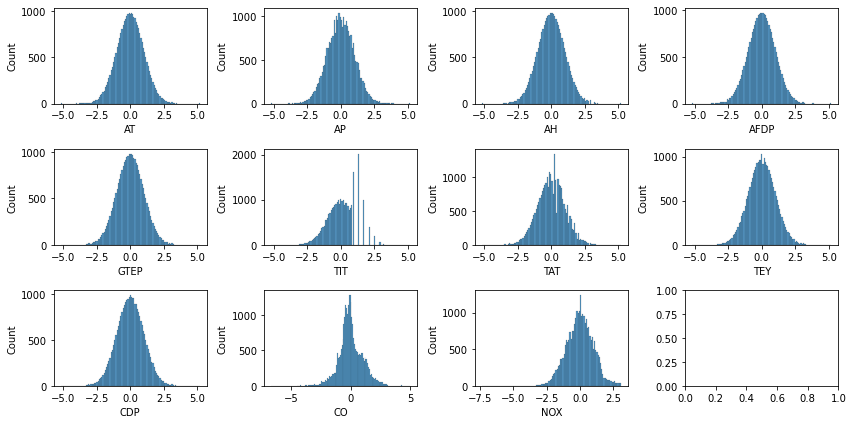

In [11]:
#Ploting X_train_scaled
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(12,6))
sns.histplot(data=X_train_scaled , x='AT', ax=axs[0,0])
sns.histplot(data=X_train_scaled , x='AP', ax=axs[0,1])
sns.histplot(data=X_train_scaled , x='AH', ax=axs[0,2])
sns.histplot(data=X_train_scaled , x='AFDP', ax=axs[0,3])
sns.histplot(data=X_train_scaled , x='GTEP', ax=axs[1,0])
sns.histplot(data=X_train_scaled , x='TIT', ax=axs[1,1])
sns.histplot(data=X_train_scaled , x='TAT', ax=axs[1,2])
sns.histplot(data=X_train_scaled , x='TEY', ax=axs[1,3])
sns.histplot(data=X_train_scaled , x='CDP', ax=axs[2,0])
sns.histplot(data=y_train_scaled , x='CO', ax=axs[2,1])
sns.histplot(data=y_train_scaled , x='NOX', ax=axs[2,2])
plt.tight_layout()
plt.show()

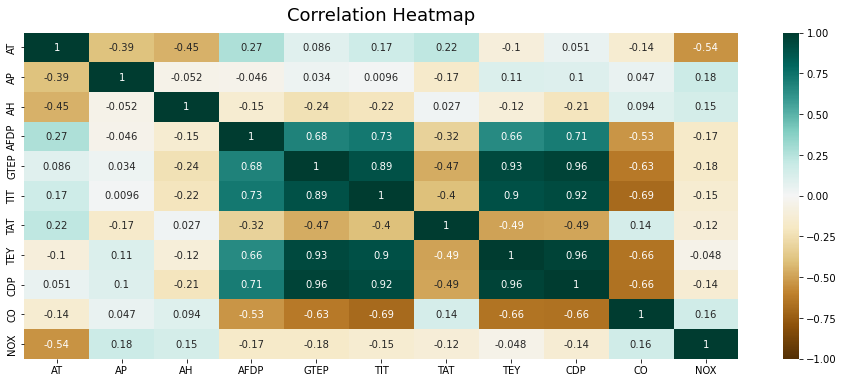

In [12]:
#Heatmap correlation
df_train_scaled = X_train_scaled.join(y_train_scaled)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_train_scaled.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

EDA and preprocessing shows there are some variables (features) that are strongly correlated.
We can divide features into two main categories: Ambient features (AT, AP, AH) and Operational Features (AFFP, GTEP, TIT, TAT, TEY, CDP). 
Ambient features are not correlated so there are ready to use in a ML model. On the other side  we decide to make a dimension reduction process in Operational Features using PCA (from 6 to 3 variables).

In [13]:
from sklearn.decomposition import PCA
operational_features_train = X_train_scaled[['AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']]
pca3 = PCA(n_components=3, random_state=0)
pca_3 = pca3.fit_transform(operational_features_train)
pca_3 = pd.DataFrame(pca_3, columns=['PCA1', 'PCA2', 'PCA3'])
pca_3

,PCA1,PCA2,PCA3
0,-3.290267,-0.011729,-0.044664
1,1.441915,0.173451,-0.355443
2,-1.125883,-0.741674,0.788773
3,-1.560241,0.470331,0.255246
4,-1.209184,-1.684569,-0.011898
...,...,...,...
27544,2.454956,0.625888,-0.524318
27545,0.839860,-0.486113,-0.820072
27546,2.968560,0.392280,-0.907863
27547,2.870664,0.807293,-0.544788


In [14]:
print('Variance Ratio per component:  ', pca3.explained_variance_ratio_)
print('Total variance considered after PCA: ', round(pca3.explained_variance_ratio_.sum(),2))

Variance Ratio per component:   [0.77037826 0.12594223 0.07092547]
Total variance considered after PCA:  0.97


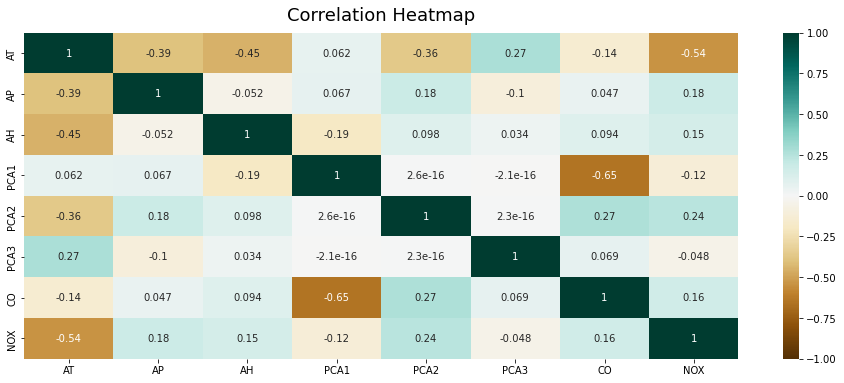

In [15]:
#Heatmap correlation
X_train_scaled_pca = X_train_scaled[['AT', 'AP', 'AH']].join(pca_3)
df_train_scaled_pca = X_train_scaled_pca.join(y_train_scaled)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_train_scaled_pca.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

## Standarization, transforming and PCA in Test Data

In [16]:
#Pipeline for standarization and transformations in testing data 
#y_test transformation
y_test_scaled = power_transformer.fit_transform(y_test)
y_test_scaled = pd.DataFrame(y_test_scaled, columns=['CO', 'NOX'])
#X_test transformation 
X_test_scaled = quantile_transformer.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled , columns=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP'])
operational_features_test = X_test_scaled[['AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']]
pca3t = PCA(n_components=3, random_state=0)
pca_3t = pca3t.fit_transform(operational_features_test)
pca_3t = pd.DataFrame(pca_3t, columns=['PCA1', 'PCA2', 'PCA3'])
X_test_scaled_pca = X_test_scaled[['AT', 'AP', 'AH']].join(pca_3)
print('Variance Ratio per component:  ', pca3t.explained_variance_ratio_)
print('Total variance considered after PCA: ', round(pca3t.explained_variance_ratio_.sum(),2))

Variance Ratio per component:   [0.77529072 0.12098191 0.06997588]
Total variance considered after PCA:  0.97


In [17]:
# import the packges for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
linear_modelco = LinearRegression ()
linear_modelco.fit(X_train_scaled_pca, y_train['CO'])
yco_pred = linear_modelco.predict(X_test_scaled_pca)

linear_modelnox = LinearRegression ()
linear_modelnox.fit(X_train_scaled_pca, y_train['NOX'])
ynox_pred = linear_modelnox.predict(X_test_scaled_pca)

MAE on testset is: 1.832


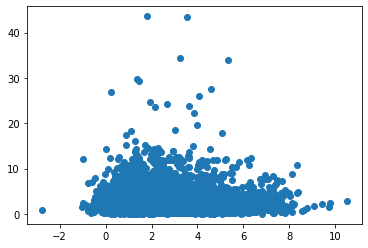

In [18]:
plt.scatter(yco_pred, y_test['CO'].to_numpy())
mae_linear_co = mean_absolute_error(y_test['CO'], yco_pred)
print("MAE on testset is:", round(mae_linear_co, 3))

MAE on testset is: 7.688


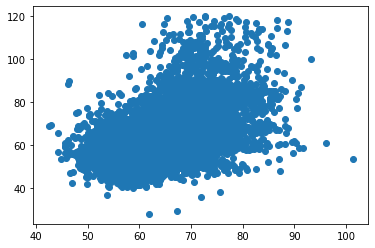

In [19]:
plt.scatter(ynox_pred, y_test['NOX'].to_numpy())
mae_linear_nox = mean_absolute_error(y_test['NOX'], ynox_pred)
print("MAE on testset is:", round(mae_linear_nox, 3))


In [20]:
# evaluate random forest ensemble for regression
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
# define dataset
# define the model
model = RandomForestRegressor( )
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train_scaled_pca, y_train_scaled, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE on cross validation set : %.3f (%.3f)' % (abs(mean(n_scores)), std(n_scores)))

MAE on cross validation set : 0.326 (0.006)


In [21]:
# fit the model 
model = RandomForestRegressor(random_state =0)
model = model.fit(X_train_scaled_pca, y_train['NOX'])
# MAE on test set again
from sklearn.metrics import mean_absolute_error
from sklearn import metrics 

y_pred = model.predict(X_test_scaled_pca)
mae = mean_absolute_error(y_test['NOX'], y_pred)

print("MAE on test set:", round (mae, 3))

MAE on test set: 8.736
